In [4]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../pyfortracc/")
import pyfortracc

import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [32]:
def read_gsmap(path):
    ds=xr.open_dataset(path, engine='netcdf4', decode_times=False)
    ds = ds['hourlyPrecipRate']
    ds=ds.sel(Latitude=slice(-90,90)).data[0]
    ds[ds < 0.1] = np.nan
    return ds

def read_imerg(path):
    ds = xr.open_dataset(path, engine='netcdf4')
    data = ds['precipitation'][0]
    data = np.rot90(data, k=1)
    data[data < 0.1] = np.nan
    return data[::-1]

In [ ]:
GSMAP_PATH = '/storage/precipitation/jaxa/v8/2020/01/01/'
IMERG_PATH = '/storage/preciptation/imerg/final_v7/2020/01/01/'

GSMAP_FILES_ = sorted(glob.glob(GSMAP_PATH + '*.nc'))
IMERG_FILES = sorted(glob.glob(IMERG_PATH + '*.nc4'))

# Duplicate GSMAP files to match IMERG files for comparison
GSMAP_FILES = []
for file in GSMAP_FILES_:
    GSMAP_FILES.append(file)
    GSMAP_FILES.append(file)

In [43]:
gsm_data = read_gsmap(GSMAP_FILES[0])

In [44]:
img_data = read_imerg(IMERG_FILES[0])

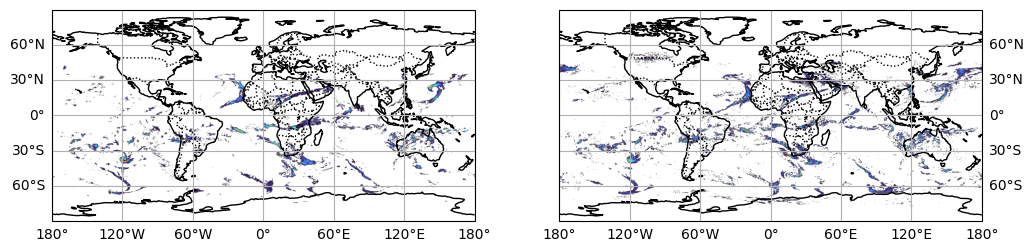

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

for ax in axs:
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    if ax == axs[0]:
        gl.right_labels = False
    else:
        gl.left_labels = False

# plot gsm_data as imshow
axs[0].imshow(gsm_data, origin='lower', extent=[0, 360, -90, 60], cmap='turbo', vmin=0, vmax=20)
axs[1].imshow(img_data, origin='lower', extent=[0, 360, -90, 60], cmap='turbo', vmin=0, vmax=20)